# Determining Feature Importance

### Import relevant packages and read in the dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Read in the data
df = pd.read_csv('../clean_dataset.csv')

y = df.iloc[:,0:7]
X = df.iloc[:,7:]

### Fit a forest and determine feature importances

In [13]:
# Build and fit a random forest classifier
forest = ExtraTreesClassifier(n_estimators=100, random_state=12)
forest.fit(X, y)

# Get feature importances from the tree classifier
importances = forest.feature_importances_

# Determine error bars for importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

### Print out results

Feature ranking:
Feature 5: Node.js (0.082524)
Feature 1: Angular (0.075929)
Feature 0: .NET Core (0.070871)
Feature 3: Django (0.070357)
Feature 6: React (0.063486)
Feature 8: Spring (0.062008)
Feature 2: Cordova (0.055843)
Feature 9: TensorFlow (0.047023)
Feature 11: Xamarin (0.045898)
Feature 4: Hadoop (0.040268)
Feature 7: Spark (0.035251)
Feature 29: HoursOutside_1 - 2 hours (0.029365)
Feature 23: StackOverflowHasAccount_Yes (0.025637)
Feature 32: HoursOutside_Less than 30 minutes (0.025252)
Feature 25: HoursComputer_5 - 8 hours (0.025065)
Feature 26: HoursComputer_9 - 12 hours (0.024727)
Feature 31: HoursOutside_30 - 59 minutes (0.024266)
Feature 22: StackOverflowHasAccount_No (0.022403)
Feature 30: HoursOutside_3 - 4 hours (0.020820)
Feature 10: Torch/PyTorch (0.017658)
Feature 21: StackOverflowHasAccount_I'm not sure / I can't remember (0.016986)
Feature 28: HoursComputer_Over 12 hours (0.015461)
Feature 13: OperatingSystem_Linux-based (0.015308)
Feature 15: OperatingSystem_Win

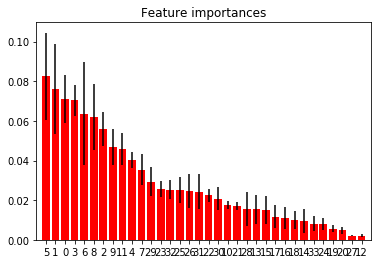

In [14]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("Feature %d: %s (%f)" % (indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()